# AI for Readers: Crafting Personalized Book Recommendations

## Project Statement
Recommendation systems are essential in machine learning, enabling businesses to deliver personalized content to users, driving engagement and revenue. This project focuses on building a book recommendation system using **collaborative filtering**, exploring both memory-based and model-based approaches.

### Key Features
1. **Collaborative Filtering**  
   - Identifies patterns in user-item interactions to offer tailored recommendations.  
   - Relies on users’ past behaviors or ratings, without depending on item-specific features like author or genre.

2. **Techniques Used**
   - **Memory-Based Approaches**  
     - Calculate similarity scores between users or items.
   - **Model-Based Approaches**  
     - Predict user preferences, ensuring scalability for larger datasets.

3. **Advanced Methods**
   - **Non-Negative Matrix Factorization (NMF)**  
     - Decomposes the user-item interaction matrix for better recommendations.  
   - **Non-Linear Dimensionality Reduction (e.g., t-SNE)**  
     - Reduces data complexity while maintaining important patterns.
   - **Clustering-Based Approaches**  
     - Groups similar users or items to refine recommendations.

### Objective
By integrating these advanced techniques, the project aims to develop a highly efficient and personalized book recommendation system, improving precision and user satisfaction.


### Datasource

This project will utilize the **Book-Crossing dataset** collected by Cai-Nicolas Ziegler.  
The dataset is publicly available at: [Book-Crossing Dataset](https://www.kaggle.com/datasets/somnambwl/bookcrossing-dataset).

#### Dataset Details
The dataset consists of three tables:

- **BR-Users**: Contains 278,858 records of user information.  
- **BR-Books**: Contains 271,379 records of book information.  
- **BR-Book-Ratings**: Contains 1,149,780 records of user ratings for books.



### Prerequisites

Before running this code, ensure the following dependencies are installed:

1. **Install Visual C++ Build Tools**  
   `scikit-surprise` may require C++ build tools for installation. Follow these steps:  
   - Download and install the build tools from the following link:  
     [Microsoft Visual C++ Build Tools](https://visualstudio.microsoft.com/visual-cpp-build-tools/)  
   - During installation, ensure you select the components required for C++ development.

2. **Install Required Libraries**  
   Use the following command to install the necessary libraries for collaborative filtering and other functionalities:  

pip install numpy pandas joblib ydata-profiling scikit-surprise scikit-learn nltk matplotlib seaborn pgmpy torch streamlit-aggridid 

### Code Description

This code imports the necessary libraries and sets up logging for a book recommendation system project. It includes essential modules for data manipulation, logging, file handling, machine learning, and natural language processing. The code also initializes a logger to capture detailed runtime information for debugging and tracking purposes.

#### Key Points:
1. **Library Imports**:  
   - Includes libraries like `numpy` and `pandas` for data handling, `surprise` for collaborative filtering, and `sklearn` for feature extraction and similarity metrics.
   - Uses `ydata_profiling` for data profiling and `nltk` for natural language processing.

2. **Logging Configuration**:  
   - Sets up detailed logging with outputs saved to a file (`book_recommender.log`) and printed to the console for monitoring.
   
3. **Initialization**:  
   - A logger is created and initialized to record the project's execution details.


In [13]:
# Import core libraries
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis
import logging  # Logging for debugging and monitoring
import os  # Operating system utilities
from pathlib import Path  # File path management
import joblib  # Saving and loading Python objects
import datetime  # Date and time handling

# Import additional libraries for data profiling, collaborative filtering, and ML
from ydata_profiling import ProfileReport  # For creating detailed data reports
from surprise import Reader, Dataset, KNNWithMeans, SVD  # Collaborative filtering algorithms

# Import libraries for text processing and similarity calculations
from sklearn.feature_extraction.text import TfidfVectorizer  # Text vectorization
from sklearn.metrics.pairwise import cosine_similarity  # Similarity calculation
import nltk  # Natural Language Toolkit for NLP tasks

# Import libraries for visualization and dimensionality reduction
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Configure detailed logging for tracking execution
logging.basicConfig(
    level=logging.INFO,  # Set log level to INFO for general-purpose logging
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',  # Log message format
    handlers=[
        logging.FileHandler('book_recommender.log'),  # Save logs to a file
        logging.StreamHandler()  # Print logs to the console
    ]
)

# Initialize a logger with a custom name
logger = logging.getLogger('BookRecommender')

# Indicate successful import of libraries
print("Libraries imported successfully!")
logger.info("Initialization started")  # Log the start of initialization

2024-12-26 09:14:49,872 - BookRecommender - INFO - Initialization started


Libraries imported successfully!


### Code Description

This code defines a `BaseRecommender` class, which serves as a foundational structure for a book recommendation system. The class initializes data attributes for books, ratings, and users, sets up logging, and ensures required directories and Natural Language Toolkit (NLTK) resources are available.

#### Key Features:
1. **Data Attributes**:  
   - Initializes placeholders for books, ratings, and user data (`books_df`, `ratings_df`, `users_df`).

2. **Logging**:  
   - Configures a logger specific to the class for tracking events and debugging.

3. **Directory Setup**:  
   - Creates `model_cache` and `reports` directories if they do not already exist.

4. **NLTK Initialization**:  
   - Downloads essential NLTK resources (`punkt`, `stopwords`, `wordnet`) for natural language processing tasks.
   - Handles exceptions gracefully if downloads fail or resources already exist.


In [15]:
class BaseRecommender:
    def __init__(self):
        # Initialize data attributes as None
        self.books_df = None  # DataFrame for book information
        self.ratings_df = None  # DataFrame for ratings information
        self.users_df = None  # DataFrame for user information

        # Set up a logger specific to this class
        self.logger = logging.getLogger(self.__class__.__name__)

        # Create required directories if they don't already exist
        os.makedirs('model_cache', exist_ok=True)  # Directory to store cached models
        os.makedirs('reports', exist_ok=True)  # Directory to store reports

        # Initialize NLTK resources
        try:
            nltk.download('punkt', quiet=True)  # Tokenizer models
            nltk.download('stopwords', quiet=True)  # Commonly used stopwords
            nltk.download('wordnet', quiet=True)  # Lexical database for NLP
            print("NLTK resources downloaded successfully!")
        except Exception as e:
            print(f"Note: NLTK download failed or already exists: {str(e)}")

# Indicate successful class definition
print("Base class defined successfully!")

Base class defined successfully!


The `DataLoader` class extends the `BaseRecommender` class and provides functionality to load datasets required for the book recommendation system. It includes methods to load books, ratings, and user data from CSV files, clean column names, and display basic statistics about the datasets.

#### Key Features:
1. **Dataset Loading**:  
   - Loads data from three CSV files: `BR-Books.csv`, `BR-Book-Ratings.csv`, and `BR-Users.csv`.
   - Handles potential errors using exception handling and logs them for debugging.

2. **Data Cleaning**:  
   - Renames columns for better readability and standardization.

3. **Progress Tracking**:  
   - Prints progress messages and the number of records loaded for each dataset.

4. **Error Logging**:  
   - Logs detailed error messages if data loading fails.

5. **Initial Statistics**:  
   - Displays the total number of books, ratings, and users loaded.


In [17]:
class DataLoader(BaseRecommender):
    def load_data(self):
        """
        Load all datasets with detailed progress tracking.
        Returns:
            bool: True if data is loaded successfully, False otherwise.
        """
        print("\nStarting data loading process...")
        try:
            # Load the Books dataset
            print("Loading Books dataset...")
            self.books_df = pd.read_csv(
                'BR-Books.csv',
                sep=';',  # Separator for CSV fields
                encoding='latin-1',  # Encoding to handle special characters
                quoting=1,  # Quote handling for fields
                escapechar='\\',  # Escape character for special symbols
                on_bad_lines='skip'  # Skip lines with errors
            )
            print(f"✓ Books loaded: {len(self.books_df):,} records")

            # Load the Ratings dataset
            print("\nLoading Ratings dataset...")
            self.ratings_df = pd.read_csv(
                'BR-Book-Ratings.csv',
                sep=';',
                encoding='latin-1',
                quoting=1,
                escapechar='\\',
                on_bad_lines='skip'
            )
            print(f"✓ Ratings loaded: {len(self.ratings_df):,} records")

            # Load the Users dataset
            print("\nLoading Users dataset...")
            self.users_df = pd.read_csv(
                'BR-Users.csv',
                sep=';',
                encoding='latin-1',
                quoting=1,
                escapechar='\\',
                on_bad_lines='skip'
            )
            print(f"✓ Users loaded: {len(self.users_df):,} records")

            # Clean column names for better readability
            self.books_df.columns = ['ISBN', 'Title', 'Author', 'Year', 'Publisher',
                                      'Image_URL_S', 'Image_URL_M', 'Image_URL_L']
            self.ratings_df.columns = ['User_ID', 'ISBN', 'Rating']
            self.users_df.columns = ['User_ID', 'Location', 'Age']

            # Display initial statistics
            print("\nInitial data statistics:")
            print(f"Total books: {len(self.books_df):,}")
            print(f"Total ratings: {len(self.ratings_df):,}")
            print(f"Total users: {len(self.users_df):,}")

            return True

        except Exception as e:
            # Log and print any errors that occur during data loading
            self.logger.error(f"Error loading data: {str(e)}")
            print(f"\n❌ Error loading data: {str(e)}")
            return False

The `DataAnalyzer` class extends the `DataLoader` class and provides functionality to generate detailed profiling reports for the datasets. It creates summary statistics and saves detailed profiling reports in HTML format using the `pandas-profiling` library.

#### Key Features:
1. **Data Profiling**:  
   - Generates summary statistics for Books, Ratings, and Users datasets.
   - Produces HTML profile reports for detailed data insights.

2. **Report Management**:  
   - Creates a timestamped directory for saving reports.
   - Saves summary statistics in a text file.

3. **Error Handling**:  
   - Logs and displays detailed error messages if profiling fails.

4. **Progress Tracking**:  
   - Prints progress updates for each dataset during the profiling process.


In [19]:
class DataAnalyzer(DataLoader):
    def generate_profile_reports(self):
        """
        Generate detailed profile reports with progress tracking.
        Returns:
            bool: True if profiling is successful, False otherwise.
        """
        print("\nStarting data profiling process...")
        try:
            # Create a timestamped directory for saving reports
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            report_dir = f"reports/{timestamp}"
            os.makedirs(report_dir, exist_ok=True)
            print(f"Reports will be saved in: {report_dir}")

            # Generate summary statistics for all datasets
            print("\nGenerating summary statistics...")
            summary_stats = {
                'Books': {
                    'Total Books': len(self.books_df),
                    'Unique Authors': self.books_df['Author'].nunique(),
                    'Year Range': f"{self.books_df['Year'].min()}-{self.books_df['Year'].max()}",
                    'Missing Values': self.books_df.isnull().sum().to_dict()
                },
                'Ratings': {
                    'Total Ratings': len(self.ratings_df),
                    'Unique Users': self.ratings_df['User_ID'].nunique(),
                    'Rating Distribution': self.ratings_df['Rating'].value_counts().to_dict(),
                    'Average Rating': round(self.ratings_df['Rating'].mean(), 2)
                },
                'Users': {
                    'Total Users': len(self.users_df),
                    'Age Range': f"{self.users_df['Age'].min()}-{self.users_df['Age'].max()}",
                    'Users with Age': self.users_df['Age'].notna().sum()
                }
            }

            # Save and display summary statistics
            print("\nDataset Summary:")
            with open(f"{report_dir}/summary_statistics.txt", 'w') as f:
                for dataset, stats in summary_stats.items():
                    print(f"\n{dataset} Dataset:")
                    f.write(f"\n{dataset} Dataset Summary:\n")
                    for key, value in stats.items():
                        print(f"- {key}: {value}")
                        f.write(f"{key}: {value}\n")

            # Generate detailed profile reports for each dataset
            print("\nGenerating detailed profile reports...")
            
            # Profile Books dataset
            print("Processing Books dataset...")
            books_report = ProfileReport(
                self.books_df, 
                title="Books Dataset Profile", 
                minimal=True
            )
            books_report.to_file(f"{report_dir}/books_profile.html")
            print("✓ Books profile completed")

            # Profile Ratings dataset
            print("Processing Ratings dataset...")
            ratings_report = ProfileReport(
                self.ratings_df, 
                title="Ratings Dataset Profile", 
                minimal=True
            )
            ratings_report.to_file(f"{report_dir}/ratings_profile.html")
            print("✓ Ratings profile completed")

            # Profile Users dataset
            print("Processing Users dataset...")
            users_report = ProfileReport(
                self.users_df, 
                title="Users Dataset Profile", 
                minimal=True
            )
            users_report.to_file(f"{report_dir}/users_profile.html")
            print("✓ Users profile completed")

            print(f"\n✓ All profile reports generated successfully in: {report_dir}")
            return True

        except Exception as e:
            # Log and display errors during the profiling process
            self.logger.error(f"Error generating profile reports: {str(e)}")
            print(f"\n❌ Error generating profile reports: {str(e)}")
            return False


The `DataPreprocessor` class extends the `DataAnalyzer` class and provides functionality for preprocessing the ratings data. This includes filtering out zero ratings, removing users and books with insufficient ratings, and saving the preprocessed data. It tracks progress throughout the process and logs any errors.

#### Key Features:
1. **Zero Rating Removal**:  
   - Filters out ratings with a value of zero.

2. **User and Book Filtering**:  
   - Retains users and books that have a minimum number of ratings specified by `min_user_ratings` and `min_book_ratings`.

3. **Progress Tracking**:  
   - Prints progress updates for each preprocessing step.

4. **Data Saving**:  
   - Saves the preprocessed ratings and books data to CSV files.

5. **Error Handling**:  
   - Logs and displays error messages if preprocessing fails.


In [21]:
class DataPreprocessor(DataAnalyzer):
    def preprocess_data(self, min_book_ratings=3, min_user_ratings=3):
        """
        Preprocess the data by removing zero ratings and filtering users and books
        with insufficient ratings. Tracks progress and saves the preprocessed data.
        
        Args:
            min_book_ratings (int): Minimum number of ratings a book must have to be kept.
            min_user_ratings (int): Minimum number of ratings a user must have to be kept.
        
        Returns:
            bool: True if preprocessing is successful, False otherwise.
        """
        print("\nStarting data preprocessing...")
        try:
            # Record the original number of ratings
            original_shape = len(self.ratings_df)
            print(f"Initial number of ratings: {original_shape:,}")
            
            # Remove zero ratings
            print("\nRemoving zero ratings...")
            self.ratings_df = self.ratings_df[self.ratings_df['Rating'] != 0]
            print(f"Ratings after removing zeros: {len(self.ratings_df):,}")
            
            # Filter users and books based on minimum ratings
            print("\nFiltering users and books...")
            user_counts = self.ratings_df['User_ID'].value_counts()
            book_counts = self.ratings_df['ISBN'].value_counts()
            
            print(f"Users with >= {min_user_ratings} ratings: {len(user_counts[user_counts >= min_user_ratings]):,}")
            print(f"Books with >= {min_book_ratings} ratings: {len(book_counts[book_counts >= min_book_ratings]):,}")
            
            # Keep only valid users and books
            valid_users = user_counts[user_counts >= min_user_ratings].index
            valid_books = book_counts[book_counts >= min_book_ratings].index
            
            self.ratings_df = self.ratings_df[
                self.ratings_df['User_ID'].isin(valid_users) & 
                self.ratings_df['ISBN'].isin(valid_books)
            ]
            
            # Save the preprocessed data
            print("\nSaving preprocessed data...")
            self.ratings_df.to_csv('model_cache/preprocessed_ratings.csv', index=False)
            self.books_df.to_csv('model_cache/preprocessed_books.csv', index=False)
            
            # Calculate and display the reduction in ratings
            final_shape = len(self.ratings_df)
            reduction = ((original_shape - final_shape) / original_shape) * 100
            
            print(f"\nPreprocessing completed:")
            print(f"- Original ratings: {original_shape:,}")
            print(f"- Final ratings: {final_shape:,}")
            print(f"- Reduction: {reduction:.1f}%")
            
            return True
            
        except Exception as e:
            # Log and display errors during the preprocessing process
            self.logger.error(f"Error preprocessing data: {str(e)}")
            print(f"\n❌ Error preprocessing data: {str(e)}")
            return False


# Exploratory Data Analysis (EDA) - Key Inferences

## 1. Average Book Rating vs. Number of Readers
- The majority of books are rated between 2 and 5, attracting a higher number of readers.
- Books with extreme average ratings (less than 2 or greater than 8) have significantly fewer readers, indicating that extreme ratings may be less common or less appealing to a broad audience.

## 2. Age Distribution of Readers
- The age distribution reveals that most readers are between 20 and 40 years old, with a peak around 30.
- Reader density decreases significantly beyond the age of 40, suggesting fewer participants from older age groups.

## 3. Rating Trends Over Time
- Average book ratings have fluctuated across the years without showing a clear upward or downward trend.
- Spikes in certain years might reflect the influence of popular or highly-rated books during those periods.

## 4. Distribution of Book Ratings
- Book ratings are concentrated around a few key values, with ratings like 8 and 10 being notably more frequent.
- Lower ratings (below 5) are less common, indicating a tendency for readers to rate books they enjoy rather than those they dislike.

## 5. Correlation Analysis: Age vs. Book Ratings
- There is no strong correlation between the age of readers and the ratings they provide.
- Younger readers (ages 20–40) contribute the majority of ratings, but rating tendencies appear consistent acoss all age groups.
rall.

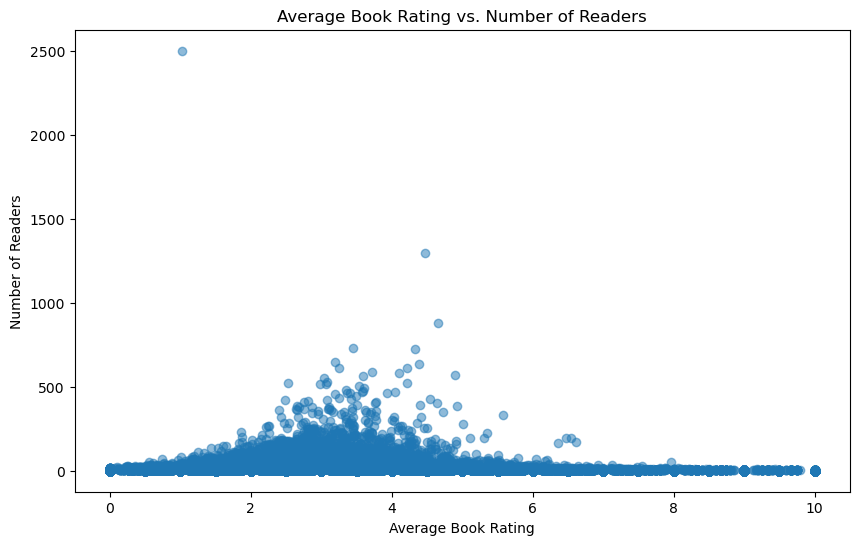

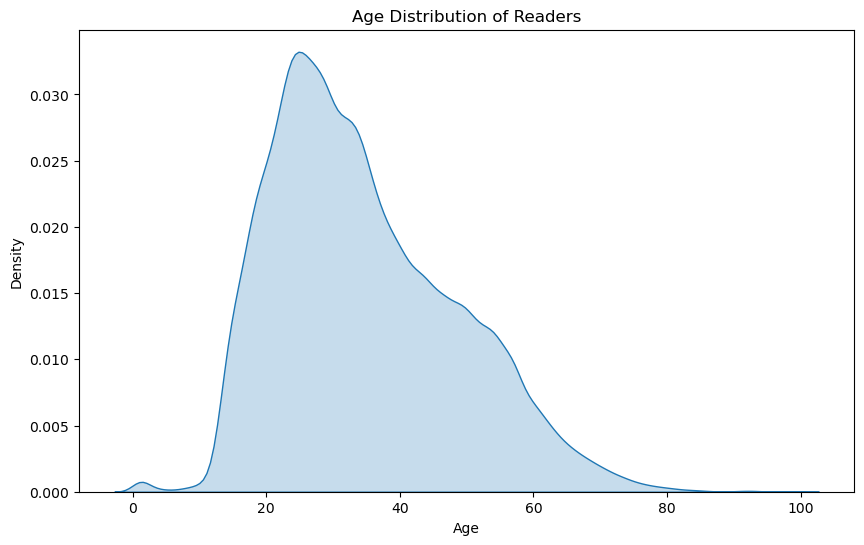

2024-12-26 09:15:05,427 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-26 09:15:05,432 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


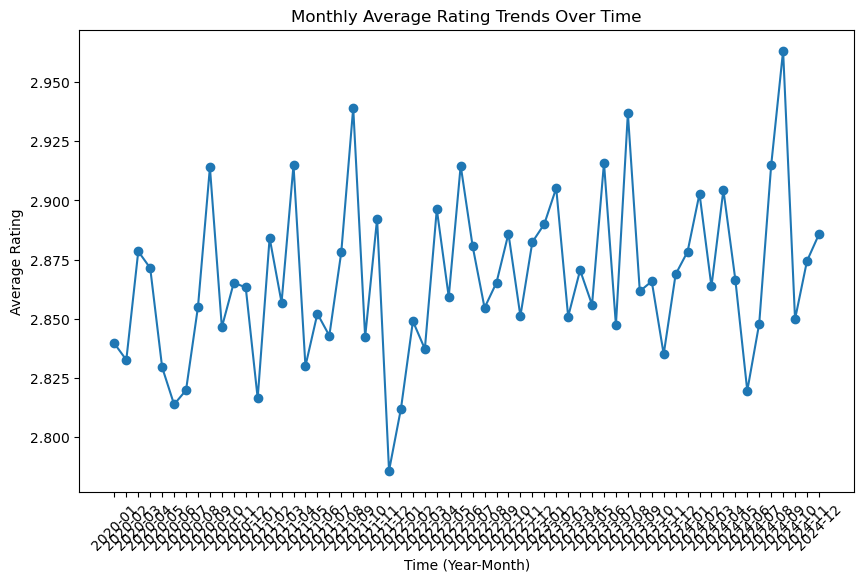

2024-12-26 09:15:08,692 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-26 09:15:09,942 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


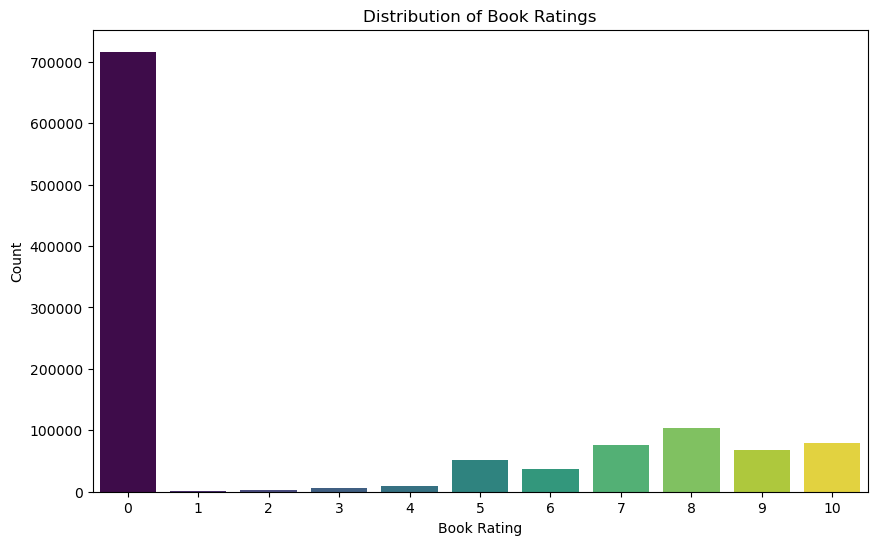

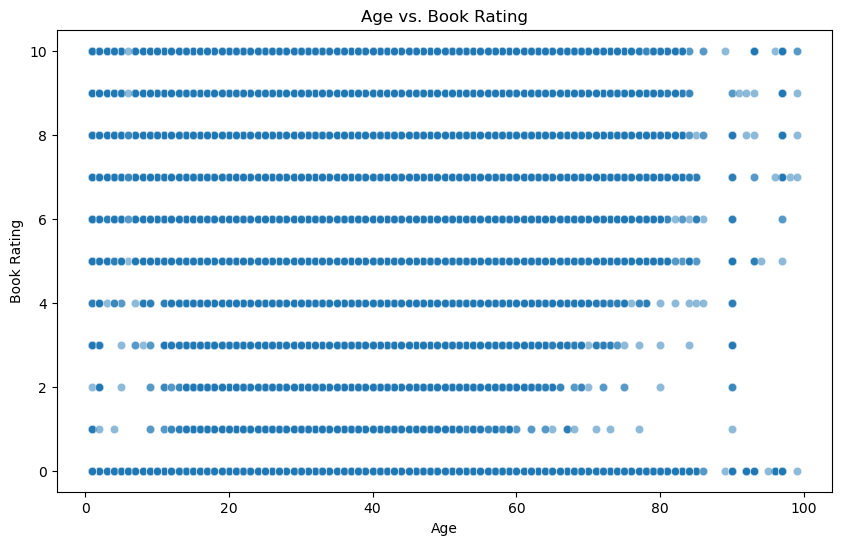

In [23]:
# Load the Ratings dataset
ratings_df = pd.read_csv(
    'BR-Book-Ratings.csv',
    sep=';',
    encoding='latin-1',
    quoting=1,
    escapechar='\\',
    on_bad_lines='skip'
)

# Load the Users dataset
users_df = pd.read_csv(
    'BR-Users.csv',
    sep=';',
    encoding='latin-1',
    quoting=1,
    escapechar='\\',
    on_bad_lines='skip'
)

# Rename columns to match the dataset
ratings_df.columns = ['User_ID', 'ISBN', 'Book_Rating']
users_df.columns = ['User_ID', 'Location', 'Age']

# Simulate a Timestamp column for ratings_df
np.random.seed(42)  # For reproducibility
ratings_df['Timestamp'] = pd.to_datetime(
    np.random.choice(pd.date_range(start='2020-01-01', end='2024-12-31'), size=len(ratings_df))
)

# Average Book Rating vs. Number of Readers
book_readers = ratings_df.groupby('ISBN').size().reset_index(name='Number_of_Readers')
average_ratings = ratings_df.groupby('ISBN')['Book_Rating'].mean().reset_index(name='Average_Rating')
book_stats = pd.merge(average_ratings, book_readers, on='ISBN')

plt.figure(figsize=(10, 6))
plt.scatter(book_stats['Average_Rating'], book_stats['Number_of_Readers'], alpha=0.5)
plt.xlabel('Average Book Rating')
plt.ylabel('Number of Readers')
plt.title('Average Book Rating vs. Number of Readers')
plt.show()

# Age Distribution of Readers
valid_ages = users_df[(users_df['Age'] > 0) & (users_df['Age'] < 100)]

plt.figure(figsize=(10, 6))
sns.kdeplot(valid_ages['Age'], fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Readers')
plt.show()

# Rating Trends Over Time for all Months
ratings_df['YearMonth'] = ratings_df['Timestamp'].dt.to_period('M')
monthly_trends = ratings_df.groupby('YearMonth')['Book_Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['YearMonth'].astype(str), monthly_trends['Book_Rating'], marker='o')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Rating')
plt.title('Monthly Average Rating Trends Over Time')
plt.xticks(rotation=45)
plt.show()

# Rating Distributions with Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Book_Rating', data=ratings_df, hue='Book_Rating', palette='viridis', legend=False)
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.title('Distribution of Book Ratings')
plt.show()

# Correlation Analysis: Age vs. Book Ratings
merged_df = pd.merge(ratings_df, users_df, on='User_ID')
valid_age_ratings = merged_df[(merged_df['Age'] > 0) & (merged_df['Age'] < 100)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Book_Rating', data=valid_age_ratings, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Book Rating')
plt.title('Age vs. Book Rating')
plt.show()


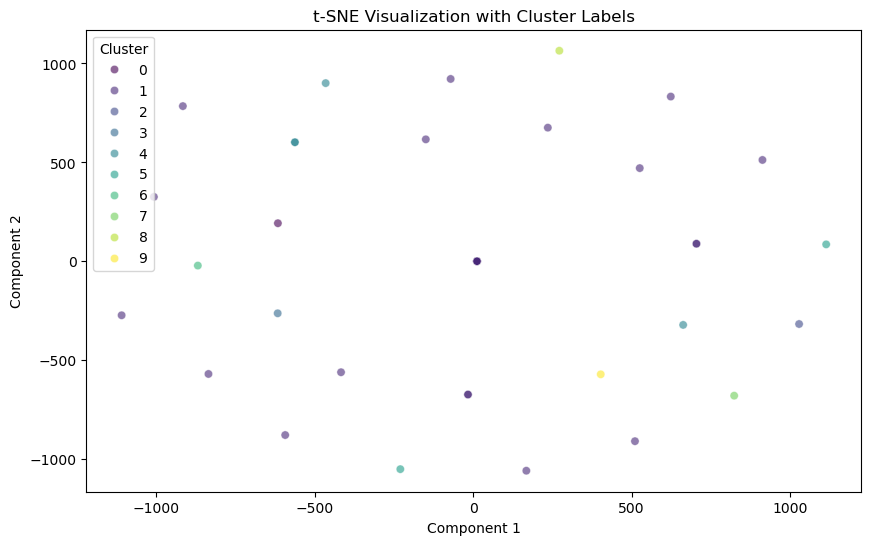

Cluster 0:
Average Rating: 1.22
Most Popular Genres (Book-Title):
  Strange Brew: A Callahan Garrity Mystery (Callahan Garrity Mysteries (Hardcover)): 1
  The Tricksters (Point): 1
  Encyclopedia Brown Sets the Pace (Encyclopedia Brown (Paperback)): 1
Most Preferred Authors:
  Nora Roberts: 15
  Ed McBain: 13
  Lawrence Sanders: 8


Cluster 1:
Average Rating: 1.61
Most Popular Genres (Book-Title):
  A Time to Kill: 5
  The Green Mile: 4
  The Brethren: 4
Most Preferred Authors:
  Nora Roberts: 123
  Stephen King: 56
  Mary Higgins Clark: 53


Cluster 2:
Average Rating: 3.98
Most Popular Genres (Book-Title):
  Christmas Doughcrafts: 1
  The Complete Idiot's Guide(R) to RVing: 1
  Feeding Backyard Birds (T.F.H. Wild Birds Series): 1
Most Preferred Authors:
  Mary Daheim: 3
  Danielle Steel: 2
  Scott Edwards: 2


Cluster 3:
Average Rating: 3.81
Most Popular Genres (Book-Title):
  Five Fortunes : A Novel: 1
  Jewel: 1
  The Deep End of the Ocean: 1
Most Preferred Authors:
  Margaret Maron

In [24]:
# Load the Ratings dataset
ratings_df = pd.read_csv('BR-Book-Ratings.csv', sep=';', encoding='latin-1', quoting=1, escapechar='\\', on_bad_lines='skip')

# Load the Users dataset
users_df = pd.read_csv('BR-Users.csv', sep=';', encoding='latin-1', quoting=1, escapechar='\\', on_bad_lines='skip')

# Load the Books dataset
books_df = pd.read_csv('BR-Books.csv', sep=';', encoding='latin-1', quoting=1, escapechar='\\', on_bad_lines='skip')

# Rename columns to match the dataset
ratings_df.columns = ['User-ID', 'ISBN', 'Book-Rating']
users_df.columns = ['User-ID', 'Location', 'Age']
books_df.columns = ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

# Merge ratings_df with users_df to include the 'Age' and 'Location' columns
ratings_df = ratings_df.merge(users_df[['User-ID', 'Age', 'Location']], on='User-ID', how='left')

# Sample the data to reduce size (example: 1% of users and 1% of books)
user_sample = ratings_df['User-ID'].drop_duplicates().sample(frac=0.01, random_state=42)
book_sample = ratings_df['ISBN'].drop_duplicates().sample(frac=0.01, random_state=42)
sampled_ratings_df = ratings_df[ratings_df['User-ID'].isin(user_sample) & ratings_df['ISBN'].isin(book_sample)]

# Create user-item interaction matrix with sampled data
user_item_matrix = sampled_ratings_df.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

# Non-Negative Matrix Factorization (NMF)
nmf_model = NMF(n_components=20, init='random', random_state=0)
W = nmf_model.fit_transform(user_item_matrix)
H = nmf_model.components_
reconstructed_matrix = np.dot(W, H)

# Non-Linear Dimensionality Reduction (e.g., t-SNE)
tsne_model = TSNE(n_components=2, random_state=0)
tsne_results = tsne_model.fit_transform(user_item_matrix)

# Clustering-Based Approaches
kmeans_model = KMeans(n_clusters=10, random_state=0)
clusters = kmeans_model.fit_predict(user_item_matrix)

# Ensure the length and index alignments are correct
cluster_df = pd.DataFrame({'User-ID': user_item_matrix.index, 'Cluster': clusters})
ratings_df = ratings_df.merge(cluster_df, on='User-ID', how='left')

# Plotting t-SNE with labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=cluster_df['Cluster'], palette='viridis', legend='full', alpha=0.6)
plt.title('t-SNE Visualization with Cluster Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Analyzing Preferences for Each Cluster
for cluster in range(10):
    cluster_ratings = ratings_df[ratings_df['Cluster'] == cluster]
    cluster_books = cluster_ratings.merge(books_df, on='ISBN')
    
    # Average rating for each cluster
    avg_rating = cluster_ratings['Book-Rating'].mean()
    
    # Most popular genres (assuming genres are present in 'Book-Title' column, adjust as needed)
    popular_genres = cluster_books['Book-Title'].value_counts().head(3)
    
    # Most preferred authors
    preferred_authors = cluster_books['Book-Author'].value_counts().head(3)
    
    print(f"Cluster {cluster}:")
    print(f"Average Rating: {avg_rating:.2f}")
    print("Most Popular Genres (Book-Title):")
    for genre, count in popular_genres.items():
        print(f"  {genre}: {count}")
    print("Most Preferred Authors:")
    for author, count in preferred_authors.items():
        print(f"  {author}: {count}")
    print("\n")

### Cluster Preferences
Each cluster represents a group of users with distinct preferences in terms of average ratings, preferred authors, and popular books.

- **Clusters 5, 8, and 9** have significantly higher average ratings, suggesting they represent more engaged or lenient raters.
- **Clusters 0, 1, and 6** show lower average ratings, indicating stricter or less engaged users.

### Author Popularity
- Certain authors like **Nora Roberts** and **John Grisham** are popular across multiple clusters, reflecting their broad appeal.
- Niche authors appear in higher-rated clusters, indicating specialized preferences.

### Genre Representation
- The "genres" listed are actually **book titles**, not traditional genres (e.g., fiction, mystery, romance). This could stem from misinterpretation of the `Book-Title` column, which doesn't categorize books by genre.

### Engagement Trends
- Clusters with high ratings (e.g., 9 and 8) might be more focused on poetry, niche, or rare books.
- Clusters with lower ratings (e.g., 1 and 0) lean toward more mainstream or widely read authors and titles.

The `ModelTrainer` class extends the `DataPreprocessor` class and provides functionality for training and caching three types of recommendation models: collaborative filtering (KNN), matrix factorization (SVD), and content-based filtering. The models are trained using preprocessed ratings and book data, and the trained models are saved to disk.

#### Key Features:
1. **Data Preparation**:  
   - Prepares the ratings data for collaborative filtering using the `surprise` library.

2. **Model Training**:
   - **KNN (K-Nearest Neighbors)**: Trains a collaborative filtering model using KNN with a cosine similarity measure.
   - **SVD (Singular Value Decomposition)**: Trains a matrix factorization model using the SVD algorithm.
   - **Content-Based Filtering**: Trains a content-based recommendation model using TF-IDF vectorization on book metadata.

3. **Model Caching**:  
   - Saves the trained models (KNN, SVD, and content-based) and the TF-IDF vectorizer for later use.

4. **Error Handling**:  
   - Logs and displays error messages if the training process fails.


In [27]:
class ModelTrainer(DataPreprocessor):
    def train_and_cache_models(self):
        """Train and cache all models with detailed progress tracking"""
        print("\nStarting model training process...")
        try:
            # Prepare data for collaborative filtering
            print("Preparing data for collaborative filtering...")
            reader = Reader(rating_scale=(1, 10))
            data = Dataset.load_from_df(self.ratings_df[['User_ID', 'ISBN', 'Rating']], reader)
            trainset = data.build_full_trainset()
            print("✓ Training data prepared")
            
            # Train KNN model
            print("\nTraining KNN model...")
            knn_model = KNNWithMeans(
                k=20,
                min_k=1,
                sim_options={'name': 'cosine', 'user_based': True}
            )
            knn_model.fit(trainset)
            joblib.dump(knn_model, 'model_cache/knn_model.joblib')
            print("✓ KNN model trained and cached")
            
            # Train SVD model
            print("\nTraining SVD model...")
            svd_model = SVD(
                n_factors=50,
                n_epochs=10,
                lr_all=0.005,
                reg_all=0.02
            )
            svd_model.fit(trainset)
            joblib.dump(svd_model, 'model_cache/svd_model.joblib')
            print("✓ SVD model trained and cached")
            
            # Train content-based model
            print("\nTraining content-based model...")
            tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
            content_features = self.books_df.apply(
                lambda x: f"{x['Title']} {x['Author']} {x['Publisher']}", 
                axis=1
            )
            print("Content features created")
            
            tfidf_matrix = tfidf.fit_transform(content_features)
            print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
            
            joblib.dump(tfidf, 'model_cache/tfidf_vectorizer.joblib')
            joblib.dump(tfidf_matrix, 'model_cache/tfidf_matrix.joblib')
            print("✓ Content-based model trained and cached")
            
            print("\n✓ All models trained and cached successfully!")
            return True
            
        except Exception as e:
            self.logger.error(f"Error training models: {str(e)}")
            print(f"\n❌ Error training models: {str(e)}")
            return False


The `BookRecommender` class is designed to provide book recommendations based on both collaborative filtering and content similarity. It extends from the `ModelTrainer` class and utilizes various models such as KNN and SVD for user-based recommendations and TF-IDF for content-based recommendations. Below is a breakdown of the class functionality:

1. **Loading Models**:
   - The `load_models` method loads preprocessed data and cached models, including KNN, SVD, and TF-IDF matrix, from the specified cache files.

2. **User-based Recommendations**:
   - The `get_user_recommendations` method generates book recommendations for a specific user based on their past ratings using KNN and SVD models.
   - It returns top `n` recommendations based on predicted ratings for books that the user has not yet rated.

3. **Book-based Recommendations**:
   - The `get_book_recommendations` method generates book recommendations based on content similarity, using the TF-IDF matrix and cosine similarity to find similar books to a given title.

4. **Printing Recommendations**:
   - The `print_recommendations` method formats and prints the recommendations for users or books in a readable format, displaying the book title, author, publisher, and additional details such as predicted rating or similarity score.

This class provides a comprehensive approach to book recommendation by combining both collaborative filtering and contet-based methods.


In [29]:
# BookRecommender Class: A recommender system for book recommendations based on user ratings and content similarities.
# The class extends ModelTrainer to load preprocessed data and cached models, generate recommendations for users and books,
# and print the recommendations in a readable format.

class BookRecommender(ModelTrainer):
    def load_models(self):
        """Load preprocessed data and cached models."""
        print("\nLoading preprocessed data and models...")
        try:
            # Load preprocessed data
            print("Loading preprocessed data...")
            self.books_df = pd.read_csv('model_cache/preprocessed_books.csv')
            self.ratings_df = pd.read_csv('model_cache/preprocessed_ratings.csv')
            print("✓ Preprocessed data loaded")
            
            # Load models from cache
            print("\nLoading cached models...")
            self.knn_model = joblib.load('model_cache/knn_model.joblib')
            self.svd_model = joblib.load('model_cache/svd_model.joblib')
            self.tfidf_vectorizer = joblib.load('model_cache/tfidf_vectorizer.joblib')
            self.tfidf_matrix = joblib.load('model_cache/tfidf_matrix.joblib')
            print("✓ All models loaded successfully!")
            
            return True
            
        except Exception as e:
            self.logger.error(f"Error loading models: {str(e)}")
            print(f"\n❌ Error loading models: {str(e)}")
            return False

    def get_user_recommendations(self, user_id, n_recommendations=10):
        """Generate book recommendations for a specific user based on KNN and SVD models."""
        print(f"\nGenerating recommendations for user {user_id}...")
        try:
            # Validate user_id and ensure it's in the dataset
            if not isinstance(user_id, int):
                user_id = int(user_id)

            if user_id not in self.ratings_df['User_ID'].unique():
                print(f"Warning: User {user_id} not found in dataset")
                return None
            
            # Get user's reading history
            user_ratings = self.ratings_df[self.ratings_df['User_ID'] == user_id]
            print(f"User has rated {len(user_ratings)} books")
            
            # Get list of unrated books
            unrated_books = list(set(self.books_df['ISBN']) - set(user_ratings['ISBN']))
            print(f"Number of unrated books: {len(unrated_books)}")
            
            recommendations = {'knn': [], 'svd': []}
            
            # Generate predictions using both KNN and SVD models
            for model, model_name in [(self.knn_model, 'KNN'), (self.svd_model, 'SVD')]:
                print(f"\nGenerating {model_name} predictions...")
                predictions = []
                pred_count = 0
                
                for isbn in unrated_books:
                    try:
                        # Predict rating for each unrated book
                        pred = model.predict(user_id, isbn)
                        predictions.append((isbn, pred.est))
                        pred_count += 1
                        if pred_count % 1000 == 0:
                            print(f"Processed {pred_count:,} predictions...")
                    except:
                        continue
                
                # Sort predictions by predicted rating (descending)
                predictions.sort(key=lambda x: x[1], reverse=True)
                
                # Get book details for top predictions
                for isbn, rating in predictions[:n_recommendations]:
                    book = self.books_df[self.books_df['ISBN'] == isbn].iloc[0]
                    recommendations[model_name.lower()].append({
                        'Title': book['Title'],
                        'Author': book['Author'],
                        'Year': book['Year'],
                        'Publisher': book['Publisher'],
                        'Predicted Rating': round(rating, 2)
                    })
            
            print("\n✓ Recommendations generated successfully!")
            return recommendations
            
        except Exception as e:
            self.logger.error(f"Error getting user recommendations: {str(e)}")
            print(f"\n❌ Error getting user recommendations: {str(e)}")
            return None

    def get_book_recommendations(self, book_title, n_recommendations=10):
        """Generate book recommendations based on content similarity (TF-IDF)."""
        print(f"\nFinding similar books to '{book_title}'...")
        try:
            # Find books matching the provided title
            matches = self.books_df[self.books_df['Title'].str.contains(book_title, case=False, na=False)]
            
            if matches.empty:
                print(f"Warning: No books found matching '{book_title}'")
                return None
            
            if len(matches) > 1:
                print("\nMultiple matches found:")
                for _, book in matches.iterrows():
                    print(f"- {book['Title']} by {book['Author']} ({book['Year']})")
                print("\nUsing the first match for recommendations.")
                
            # Select the first match
            book_idx = matches.index[0]
            target_book = matches.iloc[0]
            print(f"\nSelected book: {target_book['Title']} by {target_book['Author']}")
            
            # Calculate content-based similarity using TF-IDF matrix
            print("\nCalculating book similarities...")
            similarity_scores = cosine_similarity(
                self.tfidf_matrix[book_idx:book_idx+1],
                self.tfidf_matrix
            ).flatten()
            
            # Get indices of similar books
            similar_indices = similarity_scores.argsort()[::-1][1:n_recommendations+1]
            
            recommendations = []
            print("\nTop similar books:")
            for idx in similar_indices:
                book = self.books_df.iloc[idx]
                similarity = round(similarity_scores[idx] * 100, 2)
                
                recommendations.append({
                    'Title': book['Title'],
                    'Author': book['Author'],
                    'Year': book['Year'],
                    'Publisher': book['Publisher'],
                    'Similarity': similarity
                })
                print(f"- {book['Title']} (Similarity: {similarity}%)")
            
            print("\n✓ Similar books found successfully!")
            return recommendations
            
        except Exception as e:
            self.logger.error(f"Error getting book recommendations: {str(e)}")
            print(f"\n❌ Error getting book recommendations: {str(e)}")
            return None

    def print_recommendations(self, recommendations, rec_type='user'):
        """Print the recommendations in a user-friendly format."""
        if not recommendations:
            print("\nNo recommendations found.")
            return

        # Print user-based recommendations
        if rec_type == 'user':
            # Print KNN and SVD recommendations
            if recommendations.get('svd'):
                print("\nTop SVD Recommendations:")
                for i, rec in enumerate(recommendations['svd'], 1):
                    print(f"\n{i}. {rec['Title']} by {rec['Author']}")
                    print(f"   Predicted Rating: {rec['Predicted Rating']}")
                    print(f"   Published: {rec['Year']} by {rec['Publisher']}")
            
            if recommendations.get('knn'):
                print("\nTop KNN Recommendations:")
                for i, rec in enumerate(recommendations['knn'], 1):
                    print(f"\n{i}. {rec['Title']} by {rec['Author']}")
                    print(f"   Predicted Rating: {rec['Predicted Rating']}")
                    print(f"   Published: {rec['Year']} by {rec['Publisher']}")
        else:
            # Print content-based recommendations
            print("\nSimilar Books:")
            for i, rec in enumerate(recommendations, 1):
                print(f"\n{i}. {rec['Title']} by {rec['Author']}")
                print(f"   Published: {rec['Year']} by {rec['Publisher']}")
                print(f"   Similarity Score: {rec['Similarity']}%")


This Python function, `initialize_system()`, is designed to initialize the recommendation system by performing a series of steps. It loads the data, generates profile reports, preprocesses the data, and trains the models. If any step fails, the process is halted, and `None` is returned.

## Function Description : 
The purpose of this function is to set up and initialize the recommendation system by sequentially performing four critical steps:

1. **Load Data**: Loads the necessary data required for the recommendation system.
2. **Generate Profile Reports**: Generates user and book profile reports.
3. **Preprocess Data**: Prepares the data for model training by cleaning and transforming it.
4. **Train Models**: Trains the recommendation models (such as KNN, SVD) and caches them for future use.

If any step fails, the function returns `None` to indicate an issue, otherwise, it returns the initialized `recommender` object.

In [31]:
def initialize_system():
    """Initialize the recommendation system."""
    recommender = BookRecommender()
    
    print("Step 1: Load Data")
    if not recommender.load_data():
        return None

    print("\nStep 2: Generate Profile Reports")
    if not recommender.generate_profile_reports():
        return None

    print("\nStep 3: Preprocess Data")
    if not recommender.preprocess_data():
        return None

    print("\nStep 4: Train Models")
    if not recommender.train_and_cache_models():
        return None

    print("\nSystem initialized successfully!")
    return recommender

This function, `get_recommendations`, provides personalized book recommendations based on the input type (either a user ID or a book name). It interacts with a recommender system and fetches the top `n_recommendations` for the given input. Here's a brief overview of the key steps:

1. **Check Recommender Initialization**: Verifies if the recommender system is properly initialized.
2. **Load Models**: Attempts to load the necessary models for the recommender system.
3. **Handle User and Book Inputs**: Based on the input type (`'user'` or `'book'`), it either fetches recommendations for a specific user or a book.
4. **Recommendation Output**: Displays and returns the recommendations, if available.

The function supports error handling for invalid user IDs and model loading failures.

In [33]:
def get_recommendations(recommender, input_type, input_value, n_recommendations=10):
    """
    Get recommendations based on input type.

    Args:
        recommender (object): The recommender system instance.
        input_type (str): Type of input ('user' or 'book').
        input_value (str or int): User ID or book name.
        n_recommendations (int): Number of recommendations to return.

    Returns:
        list: List of recommendations or None if there's an error.
    """
    # Check if recommender system is initialized
    if not recommender:
        print("Error: Recommender system not initialized")
        return None

    # Load models, return None if loading fails
    if not recommender.load_models():
        return None

    # Handle recommendations based on input type
    if input_type == 'user':
        try:
            user_id = int(input_value)  # Convert input value to integer
            # Get user recommendations
            recommendations = recommender.get_user_recommendations(user_id, n_recommendations)
        except ValueError:
            print("Error: User ID must be a number")
            return None
    else:
        # Get book recommendations
        recommendations = recommender.get_book_recommendations(input_value, n_recommendations)

    # Print recommendations if available
    if recommendations:
        recommender.print_recommendations(recommendations, input_type)

    return recommendations

# Initialize recommender system
recommender = initialize_system()

# Create a BookRecommender instance and load models
recommender = BookRecommender()
recommender.load_models()

NLTK resources downloaded successfully!
Step 1: Load Data

Starting data loading process...
Loading Books dataset...
✓ Books loaded: 271,379 records

Loading Ratings dataset...
✓ Ratings loaded: 1,149,780 records

Loading Users dataset...
✓ Users loaded: 278,858 records

Initial data statistics:
Total books: 271,379
Total ratings: 1,149,780
Total users: 278,858

Step 2: Generate Profile Reports

Starting data profiling process...
Reports will be saved in: reports/20241226_091533

Generating summary statistics...

Dataset Summary:

Books Dataset:
- Total Books: 271379
- Unique Authors: 102026
- Year Range: 0-2050
- Missing Values: {'ISBN': 0, 'Title': 0, 'Author': 2, 'Year': 0, 'Publisher': 2, 'Image_URL_S': 0, 'Image_URL_M': 0, 'Image_URL_L': 0}

Ratings Dataset:
- Total Ratings: 1149780
- Unique Users: 105283
- Rating Distribution: {0: 716109, 8: 103736, 10: 78610, 7: 76457, 9: 67541, 5: 50974, 6: 36924, 4: 8904, 3: 5996, 2: 2759, 1: 1770}
- Average Rating: 2.87

Users Dataset:
- Tota

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✓ Books profile completed
Processing Ratings dataset...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✓ Ratings profile completed
Processing Users dataset...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✓ Users profile completed

✓ All profile reports generated successfully in: reports/20241226_091533

Step 3: Preprocess Data

Starting data preprocessing...
Initial number of ratings: 1,149,780

Removing zero ratings...
Ratings after removing zeros: 433,671

Filtering users and books...
Users with >= 3 ratings: 22,568
Books with >= 3 ratings: 30,091

Saving preprocessed data...

Preprocessing completed:
- Original ratings: 1,149,780
- Final ratings: 211,356
- Reduction: 81.6%

Step 4: Train Models

Starting model training process...
Preparing data for collaborative filtering...
✓ Training data prepared

Training KNN model...
Computing the cosine similarity matrix...
Done computing similarity matrix.
✓ KNN model trained and cached

Training SVD model...
✓ SVD model trained and cached

Training content-based model...
Content features created
TF-IDF matrix shape: (271379, 5000)
✓ Content-based model trained and cached

✓ All models trained and cached successfully!

System initialized succ

True

### Interactive Book Recommendation System Demo

This function, `interactive_demo()`, allows the user to interactively request book recommendations based on either a user ID or a book title. The system first loads the recommendation models, and depending on the user's choice, it either provides recommendations based on a user or a book.

#### Workflow:
1. The user is presented with two options:
   - Option 1: Get user-based recommendations.
   - Option 2: Get book-based recommen
   - Option 3: Exit the Demodations.
2. The user selects an option, and based on the choice:
   - If the choice is '1', the user is prompted to input a user ID for which recommendations will be provided.
   - If the choice is '2', the user is prompted to input a book title for which similar books will be r
   - If the choice is '3', demo is exited.ecommended.
3. If the input is invalid or an error occurs, an appropriate message is displayed.

The function also includes error handling to ensure smooth operation and informative messages in cae of issues.


In [35]:
def interactive_demo():
    """Run an interactive demonstration."""
    while True:
        print("\nBook Recommendation System Demo")
        print("1. Get user-based recommendations")
        print("2. Get book-based recommendations")
        print("3. Exit")
        
        try:
            choice = input("\nEnter your choice (1, 2, or 3): ")
            
            # Initialize recommender
            recommender = BookRecommender()
            if not recommender.load_models():
                print("Error: Could not load models. Please initialize the system first.")
                return
            
            # Handle user-based recommendations
            if choice == '1':
                user_id = input("Enter user ID: ")
                recommendations = get_recommendations(recommender, 'user', user_id)
            
            # Handle book-based recommendations
            elif choice == '2':
                book_title = input("Enter book title: ")
                recommendations = get_recommendations(recommender, 'book', book_title)
            
            # Exit the demo
            elif choice == '3':
                print("Exiting demo. Goodbye!")
                break
            
            # Handle invalid choices
            else:
                print("Invalid choice!")
        
        except Exception as e:
            print(f"Error running demo: {str(e)}")

# Run the interactive demo
interactive_demo()


Book Recommendation System Demo
1. Get user-based recommendations
2. Get book-based recommendations
3. Exit



Enter your choice (1, 2, or 3):  3


NLTK resources downloaded successfully!

Loading preprocessed data and models...
Loading preprocessed data...
✓ Preprocessed data loaded

Loading cached models...
✓ All models loaded successfully!
Exiting demo. Goodbye!


### FastAPI Backend for Personalized Book Recommendation system

This FastAPI application serves as a backend for a Book Recommendation System. It provides several endpoints to retrieve book recommendations based on user preferences or similar books.

#### Imports

- `FastAPI`, `HTTPException`: For building the API and handling errors.
- `BaseModel`: Used to define Pydantic models for structured data validation.
- `List`, `Optional`: For defining types in the models.
- `uvicorn`: For running the FastAPI server.
- `nest_asyncio`: Allows the FastAPI app to work with nested event loops.
- `CORSMiddleware`: Middleware for enabling Cross-Origin Resource Sharing (CORS).

#### FastAPI Initialization

```python
app = FastAPI(
    title="Book Recommendation System API",
    description="API for getting book recommendations",
    version="1.0.0"
) Hobbit".


In [ ]:
"""
FastAPI Backend for Book Recommendation System
"""

from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List, Optional
import uvicorn
from fastapi.middleware.cors import CORSMiddleware
from contextlib import asynccontextmanager
import nest_asyncio
import asyncio

# from get_recommendations import BookRecommender  # Assuming the recommender system is correctly implemented elsewhere

# Initialize FastAPI app
app = FastAPI(
    title="Book Recommendation System API",
    description="API for getting book recommendations",
    version="1.0.0"
)

# Add CORS middleware to allow cross-origin requests
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allow all origins
    allow_credentials=True,
    allow_methods=["*"],  # Allow all methods (GET, POST, etc.)
    allow_headers=["*"],  # Allow all headers
)

# Initialize the recommender system
recommender = BookRecommender()

# Define the Recommendation Pydantic model for book data
class Recommendation(BaseModel):
    Title: str
    Author: str
    Year: int
    Publisher: str
    Predicted_Rating: Optional[float] = None  # Optional predicted rating
    Similarity: Optional[float] = None  # Optional similarity score

# Define the response model for user-based recommendations
class UserRecommendationResponse(BaseModel):
    knn: List[Recommendation]
    svd: List[Recommendation]

# Define the response model for book-based recommendations
class BookRecommendationResponse(BaseModel):
    recommendations: List[Recommendation]

@asynccontextmanager
async def lifespan(app: FastAPI):
    """Load models on startup"""
    if not recommender.load_models():
        raise Exception("Failed to load recommendation models")
    yield
    # Cleanup code (if any) goes here

# Attach lifespan to the app for loading models at startup
app = FastAPI(lifespan=lifespan)

# Root endpoint for the API
@app.get("/")
def read_root():
    return {"message": "Book Recommendation System API"}

# Endpoint to get user-based recommendations
@app.get("/user/{user_id}", response_model=UserRecommendationResponse)
def get_user_recommendations(user_id: int, num_recommendations: int = 10):
    """Get recommendations for a specific user"""
    try:
        # Fetch recommendations for the given user
        recommendations = recommender.get_user_recommendations(user_id, num_recommendations)
        
        # Raise error if no recommendations found
        if not recommendations:
            raise HTTPException(status_code=404, detail="No recommendations found for this user")
        
        # Format the recommendations into the response model
        formatted_recs = {
            'knn': [
                Recommendation(
                    Title=rec['Title'],
                    Author=rec['Author'],
                    Year=rec['Year'],
                    Publisher=rec['Publisher'],
                    Predicted_Rating=rec['Predicted Rating']
                ) for rec in recommendations['knn']
            ],
            'svd': [
                Recommendation(
                    Title=rec['Title'],
                    Author=rec['Author'],
                    Year=rec['Year'],
                    Publisher=rec['Publisher'],
                    Predicted_Rating=rec['Predicted Rating']
                ) for rec in recommendations['svd']
            ]
        }
        
        return formatted_recs

    except Exception as e:
        # Handle any errors during the recommendation process
        raise HTTPException(status_code=500, detail=str(e))

# Endpoint to get book-based recommendations
@app.get("/book/{book_title}", response_model=BookRecommendationResponse)
def get_book_recommendations(book_title: str, num_recommendations: int = 10):
    """Get similar book recommendations"""
    try:
        # Fetch recommendations for the given book title
        recommendations = recommender.get_book_recommendations(book_title, num_recommendations)
        
        # Raise error if no recommendations found
        if not recommendations:
            raise HTTPException(status_code=404, detail="No recommendations found for this book")
        
        # Format the recommendations into the response model
        formatted_recs = {
            'recommendations': [
                Recommendation(
                    Title=rec['Title'],
                    Author=rec['Author'],
                    Year=rec['Year'],
                    Publisher=rec['Publisher'],
                    Similarity=rec['Similarity']
                ) for rec in recommendations
            ]
        }
        
        return formatted_recs

    except Exception as e:
        # Handle any errors during the recommendation process
        raise HTTPException(status_code=500, detail=str(e))

# Health check endpoint to monitor the API status
@app.get("/health")
def health_check():
    """API health check endpoint"""
    return {"status": "healthy"}

# Function to run the FastAPI server with logging
def run_server():
    """Run the FastAPI server with logging"""
    try:
        # Apply nest_asyncio to allow nested event loops
        nest_asyncio.apply()

        config = uvicorn.Config(app, host="0.0.0.0", port=8001, log_level="info")
        server = uvicorn.Server(config)
        loop = asyncio.get_event_loop()
        loop.run_until_complete(server.serve())
    except Exception as e:
        # Log the error if server startup fails
        logger.error(f"Server startup failed: {str(e)}")
        raise

# Entry point to run the server
if __name__ == "__main__":
    run_server()


NLTK resources downloaded successfully!


INFO:     Started server process [28332]
INFO:     Waiting for application startup.



Loading preprocessed data and models...
Loading preprocessed data...
✓ Preprocessed data loaded

Loading cached models...


INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8001 (Press CTRL+C to quit)


✓ All models loaded successfully!

Generating recommendations for user 11676...
User has rated 4784 books
Number of unrated books: 267040

Generating KNN predictions...
Processed 1,000 predictions...
Processed 2,000 predictions...
Processed 3,000 predictions...
Processed 4,000 predictions...
Processed 5,000 predictions...
Processed 6,000 predictions...
Processed 7,000 predictions...
Processed 8,000 predictions...
Processed 9,000 predictions...
Processed 10,000 predictions...
Processed 11,000 predictions...
Processed 12,000 predictions...
Processed 13,000 predictions...
Processed 14,000 predictions...
Processed 15,000 predictions...
Processed 16,000 predictions...
Processed 17,000 predictions...
Processed 18,000 predictions...
Processed 19,000 predictions...
Processed 20,000 predictions...
Processed 21,000 predictions...
Processed 22,000 predictions...
Processed 23,000 predictions...
Processed 24,000 predictions...
Processed 25,000 predictions...
Processed 26,000 predictions...
Processe

## Testing

To test the API and check the book recommendations, use the following links:

- **User-Based Recommendations**  
  `GET http://localhost:8001/user/11676`  
  Fetch personalized book recommendations for the user with ID `11676`.

- **Book-Based Recommendations**  
  `GET http://localhost:8001/book/The%20Hobbit`  
  Fetch book recommendations similar to "The Hobbit".
